In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
def estimate_face_direction(face_landmarks):
    left_eye = face_landmarks.landmark[133]
    right_eye = face_landmarks.landmark[362]
    nose = face_landmarks.landmark[1]
    mouth_left = face_landmarks.landmark[61]
    mouth_right = face_landmarks.landmark[291]
    
    # 눈과 코의 상대적인 위치를 분석하여 얼굴 방향을 추정합니다.
    eye_distance = right_eye.x - left_eye.x
    nose_position = nose.x
    mouth_width = mouth_right.x - mouth_left.x

    # 얼굴 방향 추정 로직을 구현합니다.
    if eye_distance > 0.2 and nose_position < 0.3 and mouth_width > 0.4:
        face_direction = "왼쪽으로 회전"
    elif eye_distance > 0.2 and nose_position > 0.7 and mouth_width > 0.4:
        face_direction = "오른쪽으로 회전"
    else:
        face_direction = "정면"

    return face_direction

In [3]:
# MediaPipe의 FaceDetection과 FaceMesh 모듈을 초기화합니다.
mp_drawing = mp.solutions.drawing_utils
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh

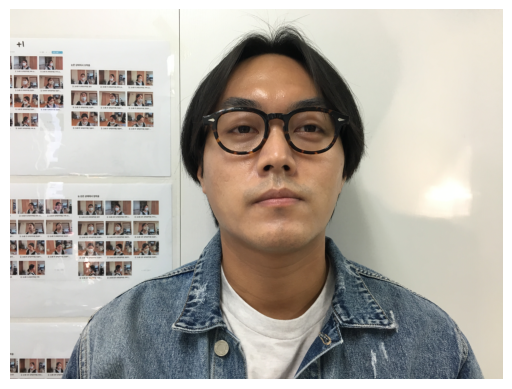

In [11]:
image = cv2.imread('c:/data/images/face_front.jpg')
# image = cv2.imread('c:/data/images/face_side.jpg')
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.axis("off")
plt.show()

In [5]:
# 얼굴 감지 모델과 표준 랜드마크 모델을 초기화합니다.
face_detection = mp_face_detection.FaceDetection()
face_mesh = mp_face_mesh.FaceMesh()

In [12]:
# 얼굴 감지를 수행합니다.
results_detection = face_detection.process(imgRGB)

if results_detection.detections:
    for detection in results_detection.detections:
        # 감지된 얼굴 영역에서 표준 랜드마크를 추출합니다.
        results_mesh = face_mesh.process(imgRGB)

        if results_mesh.multi_face_landmarks:
            for face_landmarks in results_mesh.multi_face_landmarks:
                # 얼굴 방향을 추정합니다.
                face_direction = estimate_face_direction(face_landmarks)

                # 얼굴 방향 정보를 출력합니다.
                cv2.putText(imgRGB, face_direction, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # 얼굴 랜드마크를 그려줍니다.
                mp_drawing.draw_detection(imgRGB, detection)
                mp_drawing.draw_landmarks(
                    image=imgRGB,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION
                )

cv2.imshow('Face Direction Estimation', imgRGB)
cv2.waitKey(0)
cv2.destroyAllWindows()